In [1]:
# Gerekli Kütüphaneleri Yükleyelim
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [2]:
df = pd.read_csv('car_data_processed.csv')

In [3]:
#Train Test Bölümlerinin Oluşturalım

X = df.drop(['Fiyat'], axis=1)
y = df['Fiyat']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 )

print('x_train :', x_train.shape)
print('x_test :', x_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

x_train : (806, 7)
x_test : (202, 7)
y_train : (806,)
y_test : (202,)


In [4]:
# Modelleri Denemek İçin Çağılarım (LinearRegression, Lasso)
from sklearn.linear_model import LinearRegression, Lasso

In [5]:
# Lineer Regresyon Train
lr = LinearRegression()
lr.fit(x_train,y_train)
# 
y_predict = lr.predict(x_test) # üretilen modeli (lr) test vverisi ile deneyelim
y_predict  #tahmin ettiği değerleri görelim

array([2277727.1076803 , 1005612.03491861,  961821.74623764,
       1121349.56299644, 1279337.86832522,  856975.29216411,
        299358.25585835,  881009.47733498, 2085582.20104044,
       1056083.78347584, 1353884.27471015,  925194.35479269,
        878792.44411647, 2025898.37795288, 1232681.40646765,
       1252392.15158056,  284323.59598702, 1131765.56342103,
        834213.31464903, 1037602.74496123, 1007162.12572511,
        919103.75951475, 2167050.97839449,  527619.16882864,
       1017521.31798507,  973371.79246171, 1261916.95127458,
        776563.05056459, 1242168.87566467, 1245297.7253306 ,
       2192411.78011978,  880195.9491384 , 1114740.92733654,
        745588.37906247, 1086436.96890774,  825909.22394446,
        625638.67710339,  950218.14164598, 1201152.45942099,
       1313222.89046834,  682126.74019276, 2056193.33645904,
        844991.69610468, 2164719.62375049,  892384.29984023,
       1065127.04018337, 1244979.949441  ,  720262.17703462,
       1304322.44652268,

In [6]:
# metrikleri görelim
print('mean absolute error: ',mean_absolute_error(y_test, y_predict))
print(' root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict))

mean absolute error:  217724.03563603523
 root mean squared error:  282204.71999714314
Coefficient of determination R^2:  0.6164554251221293


mean absolute error:  217724.03563603523
root mean squared error:  282204.71999714314
Coefficient of determination R^2:  0.6164554251221293


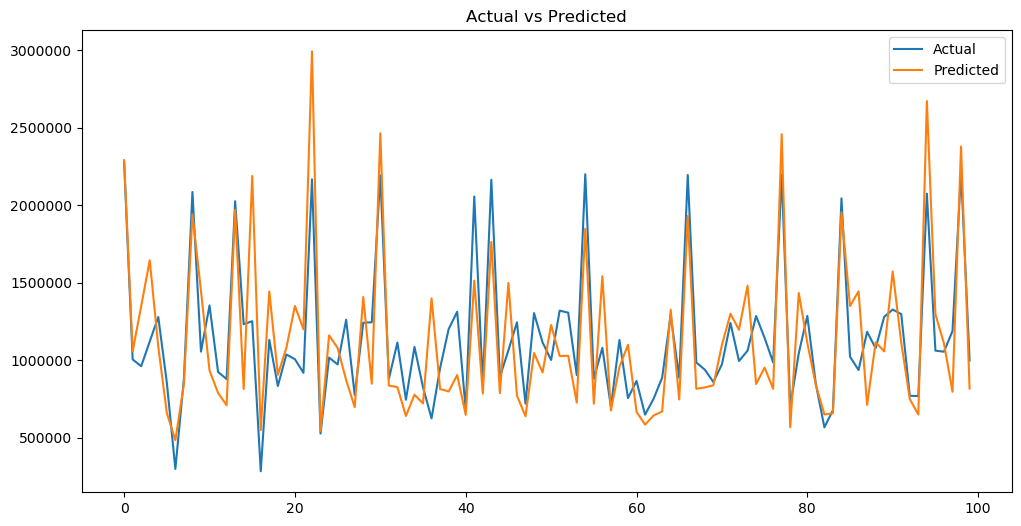

In [7]:
# Lineer Regresyon Train
lr = LinearRegression()
lr.fit(x_train,y_train)
# 
y_predict_lr = lr.predict(x_test) # üretilen modeli (lr) test vverisi ile deneyelim

mae_lr = mean_absolute_error(y_test, y_predict_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test,y_predict_lr))
r2_lr = r2_score(y_test,y_predict_lr)
print('mean absolute error: ',mae_lr)
print('root mean squared error: ',rmse_lr)
print('Coefficient of determination R^2: ',r2_lr)

# Tahmin edilen değerler ile gerçek değerleri yanyana grafikte görelim
fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_lr,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

mean absolute error:  120979.599009901
root mean squared error:  201251.125669824
Coefficient of determination R^2:  0.8049419249166616


C:\Users\bdalg\anaconda3\envs\py37\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


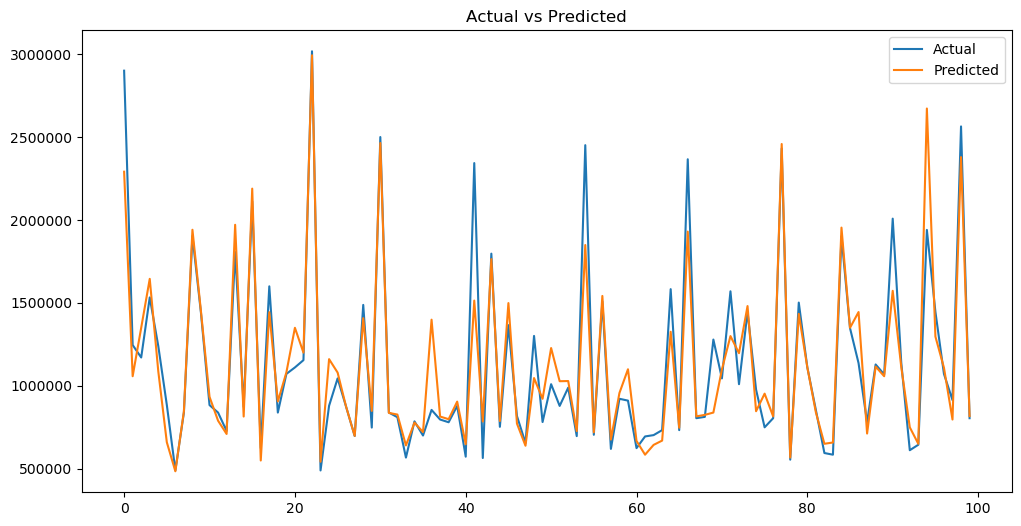

In [8]:
#decisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(criterion='mse',splitter='best')
dt.fit(x_train,y_train)
y_predict_dt = dt.predict(x_test)

mae_dt = mean_absolute_error(y_test, y_predict_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test,y_predict_dt))
r2_dt = r2_score(y_test,y_predict_dt)
print('mean absolute error: ',mae_dt)
print('root mean squared error: ',rmse_dt)
print('Coefficient of determination R^2: ',r2_dt)

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_dt,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

mean absolute error:  217724.03543639393
root mean squared error:  282204.71962533117
Coefficient of determination R^2:  0.6164554261327889


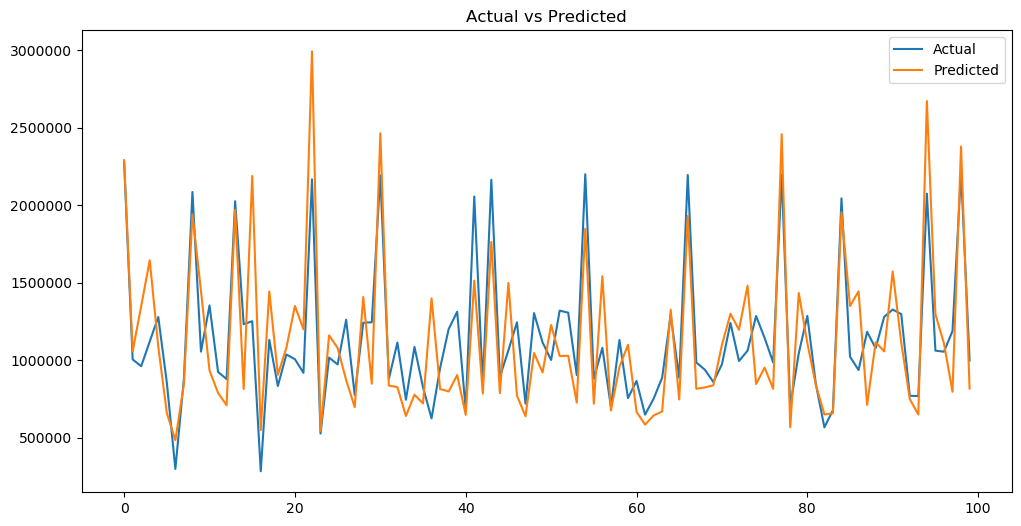

In [9]:
# Lasso regressyon için aynı uygulamayı yapalım 
lasso = Lasso(alpha=0.001)
lasso.fit(x_train,y_train)
y_predict_lasso = lasso.predict(x_test) 

mae_lasso = mean_absolute_error(y_test, y_predict_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test,y_predict_lasso))
r2_lasso = r2_score(y_test,y_predict_lasso)
print('mean absolute error: ',mae_lasso)
print('root mean squared error: ',rmse_lasso)
print('Coefficient of determination R^2: ',r2_lasso)

# Lasso İçin Tahmin Grafiği Çizelim
fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_lasso,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

mean absolute error:  103329.16006600662
root mean squared error:  162151.24709071545
Coefficient of determination R^2:  0.8733725433707678


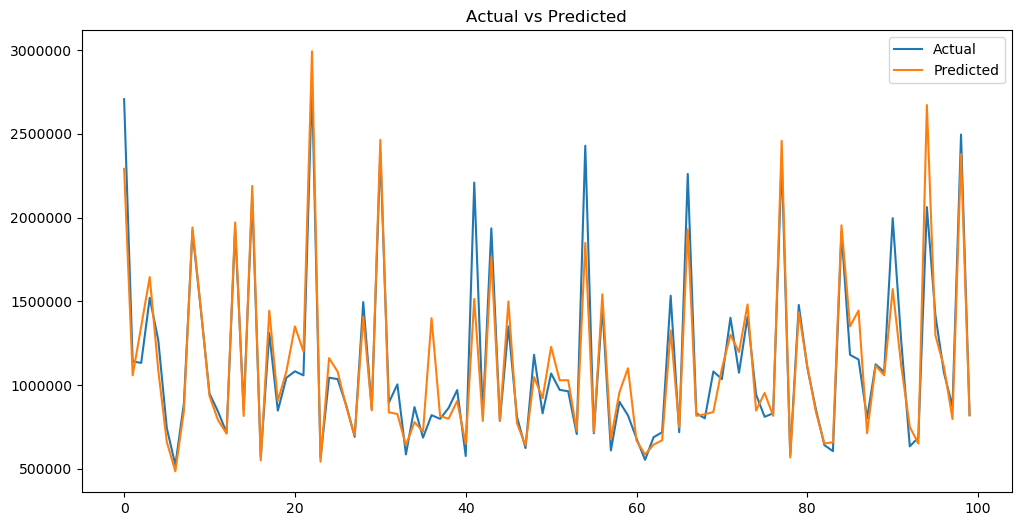

In [10]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_predict_rf = rf.predict(x_test)

mae_rf = mean_absolute_error(y_test, y_predict_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test,y_predict_rf))
r2_rf = r2_score(y_test,y_predict_rf)
print('mean absolute error: ',mae_rf)
print('root mean squared error: ',rmse_rf)
print('Coefficient of determination R^2: ',r2_rf)

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_rf,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

mean absolute error:  229630.58441623172
root mean squared error:  299160.4474118248
Coefficient of determination R^2:  0.5689817633668488


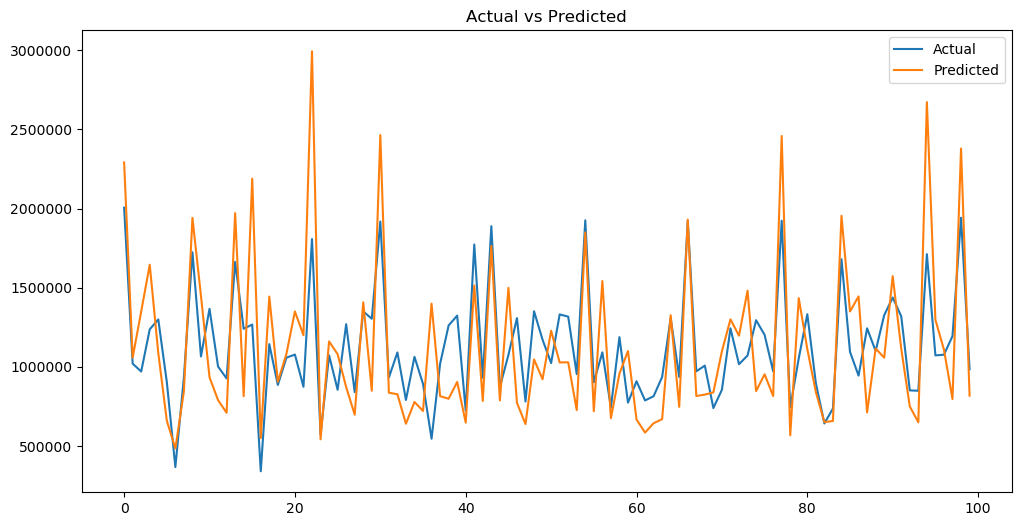

In [11]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha=0.1)
en.fit(x_train, y_train)
y_predict_en = en.predict(x_test)

mae_en = mean_absolute_error(y_test, y_predict_en)
rmse_en = np.sqrt(mean_squared_error(y_test,y_predict_en))
r2_en = r2_score(y_test,y_predict_en)

print('mean absolute error: ',mae_en)
print('root mean squared error: ',rmse_en)
print('Coefficient of determination R^2: ',r2_en)

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_en,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

mean absolute error:  217713.68583478752
root mean squared error:  282195.9440705275
Coefficient of determination R^2:  0.6164792794836449


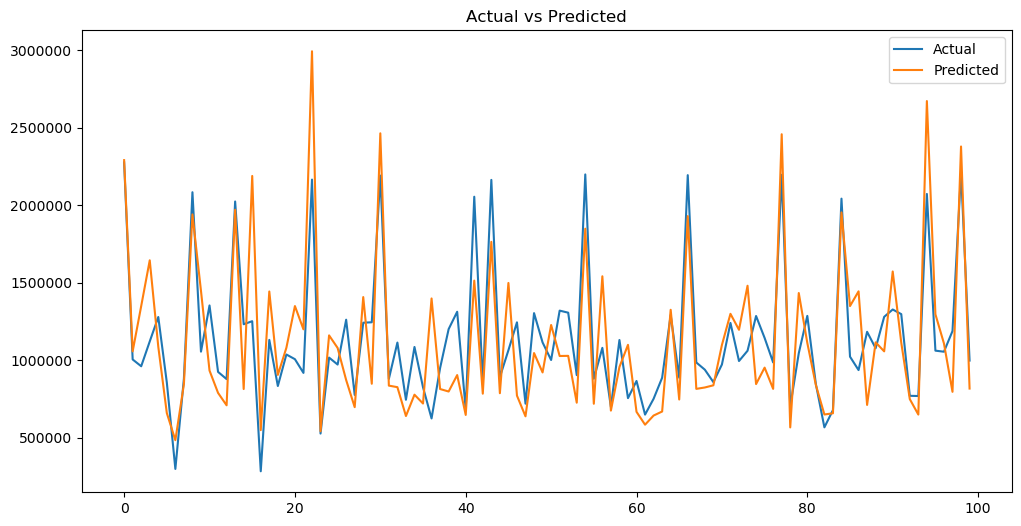

In [12]:
#Ridge
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1)

ridge.fit(x_train, y_train)
y_predict_ridge = ridge.predict(x_test)

mae_ridge = mean_absolute_error(y_test, y_predict_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test,y_predict_ridge))
r2_ridge = r2_score(y_test,y_predict_ridge)

print('mean absolute error: ',mae_ridge)
print('root mean squared error: ',rmse_ridge)
print('Coefficient of determination R^2: ',r2_ridge)

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_ridge,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

mean absolute error:  186989.01485148515
root mean squared error:  279178.93768111774
Coefficient of determination R^2:  0.6246360173238605


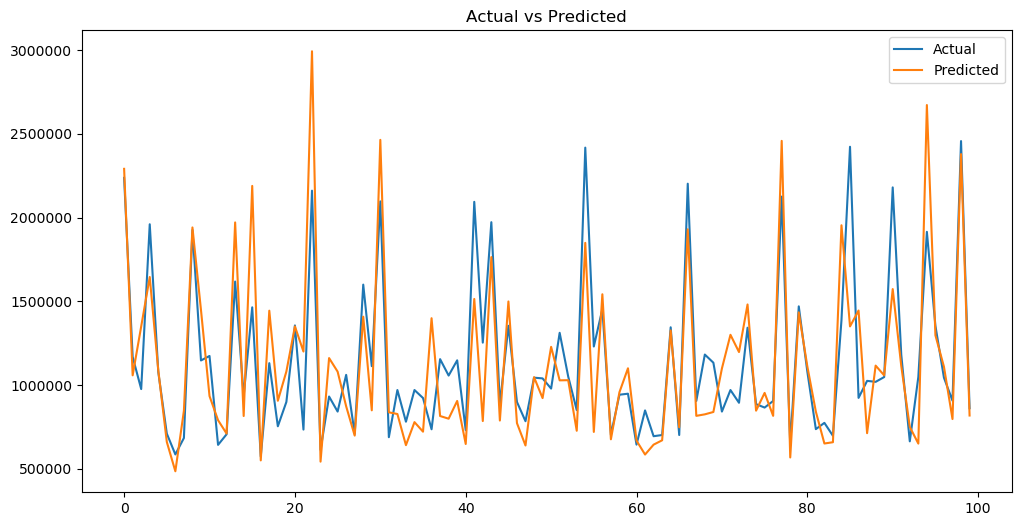

In [13]:
# KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor()
kn.fit(x_train, y_train)
y_predict_kn = kn.predict(x_test)

mae_kn = mean_absolute_error(y_test, y_predict_kn)
rmse_kn = np.sqrt(mean_squared_error(y_test,y_predict_kn))
r2_kn = r2_score(y_test,y_predict_kn)

print('mean absolute error: ',mae_kn)
print('root mean squared error: ',rmse_kn)
print('Coefficient of determination R^2: ',r2_kn)

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_kn,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

In [14]:
final_RMSE = pd.DataFrame( data  = [[rmse_lr, rmse_dt, rmse_lasso, rmse_rf, rmse_en, rmse_ridge, rmse_kn],
                                    [r2_lr,r2_dt, r2_lasso, r2_rf, r2_en, r2_ridge, r2_kn]],
                          columns  = ['Linear Regression','Lasso','Decision Tree Regressor',
                                      'Random Forest Regressor', 'ElasticNet' , 'Ridge', 'KNeighborsRegressor'],
                         index =['RMSE','R2'])


final_RMSE = final_RMSE.T

cm = sns.light_palette('green', as_cmap=True)

final_RMSE = final_RMSE.style.background_gradient(cmap=cm)
final_RMSE

,RMSE,R2
Linear Regression,282204.719997,0.616455
Lasso,201251.125670,0.804942
Decision Tree Regressor,282204.719625,0.616455
Random Forest Regressor,162151.247091,0.873373
ElasticNet,299160.447412,0.568982
Ridge,282195.944071,0.616479
KNeighborsRegressor,279178.937681,0.624636


In [ ]:
#chi2 feature selection

In [77]:
#Fine Tunning Grid Search
from sklearn.model_selection import GridSearchCV
# tüm parametreler için değil sadece iki temel parametre için arama yapıyoruz!!!
params_grid = {
    'n_estimators':[10,20,50],
    'max_leaf_nodes':list(range(0,5))}


grid_search = GridSearchCV(RandomForestRegressor(min_samples_split=2,bootstrap=False,random_state=42), params_grid, verbose=1, cv=3)

grid_search.fit(x_train, y_train)


Fitting 3 folds for each of 15 candidates, totalling 45 fits


C:\Users\bdalg\anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\bdalg\anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bdalg\anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "C:\Users\bdalg\anaconda3\envs\py37\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  F

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(bootstrap=False, random_state=42),
             param_grid={'max_leaf_nodes': [0, 1, 2, 3, 4],
                         'n_estimators': [10, 20, 50]},
             verbose=1)

In [78]:
grid_search.best_params_    # en uygun parametreleri yazdır 

{'max_leaf_nodes': 4, 'n_estimators': 10}

mean absolute error:  176251.44247878576
root mean squared error:  255200.83512578695
Coefficient of determination R^2:  0.6863455307448694


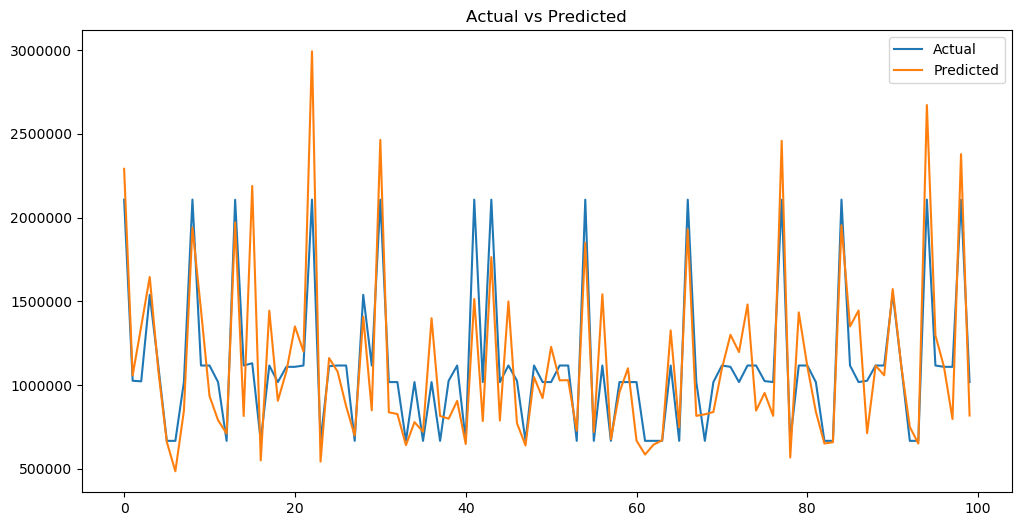

In [100]:
# bulduğumuz parametrelerle test edelim
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10,max_leaf_nodes=4)
rf.fit(x_train,y_train)
y_predict_rf = rf.predict(x_test)
print('mean absolute error: ',mean_absolute_error(y_test, y_predict_rf))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_rf)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_rf))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_rf,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()



In [85]:
rf=RandomForestRegressor(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

C:\Users\bdalg\anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\bdalg\anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bdalg\anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "C:\Users\bdalg\anaconda3\envs\py37\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):

KeyError: 'gini'

In [86]:
CV_rf.best_params_

NameError: name 'CV_rf' is not defined

mean absolute error:  179126.80343801787
root mean squared error:  262199.8673307218
Coefficient of determination R^2:  0.6689052969110483


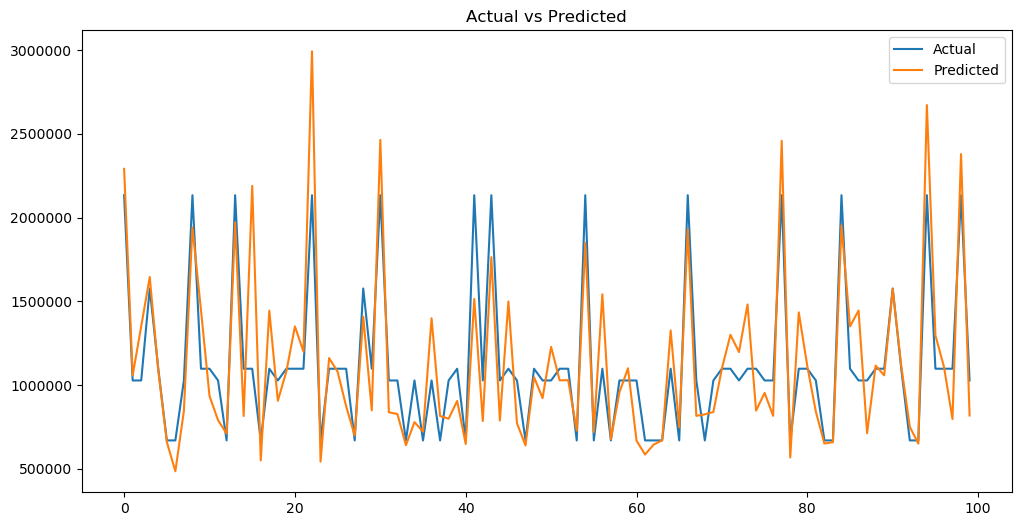

In [87]:
# bulduğumuz parametrelerle test edelim
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10,max_leaf_nodes=4)
rf.fit(x_train,y_train)
y_predict_rf = rf.predict(x_test)
print('mean absolute error: ',mean_absolute_error(y_test, y_predict_rf))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_rf)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_rf))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_rf,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()


In [95]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}
